In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from sklearn.cluster import KMeans


In [2]:
file_path = 'RTA Dataset.csv'
data = pd.read_csv(file_path)


In [3]:
print('Dataset Shape:', data.shape)
print('Dataset Info:', data.info())
print('Dataset Description:', data.describe())


Dataset Shape: (12316, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road

In [4]:
data.dropna(inplace=True)


In [5]:
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


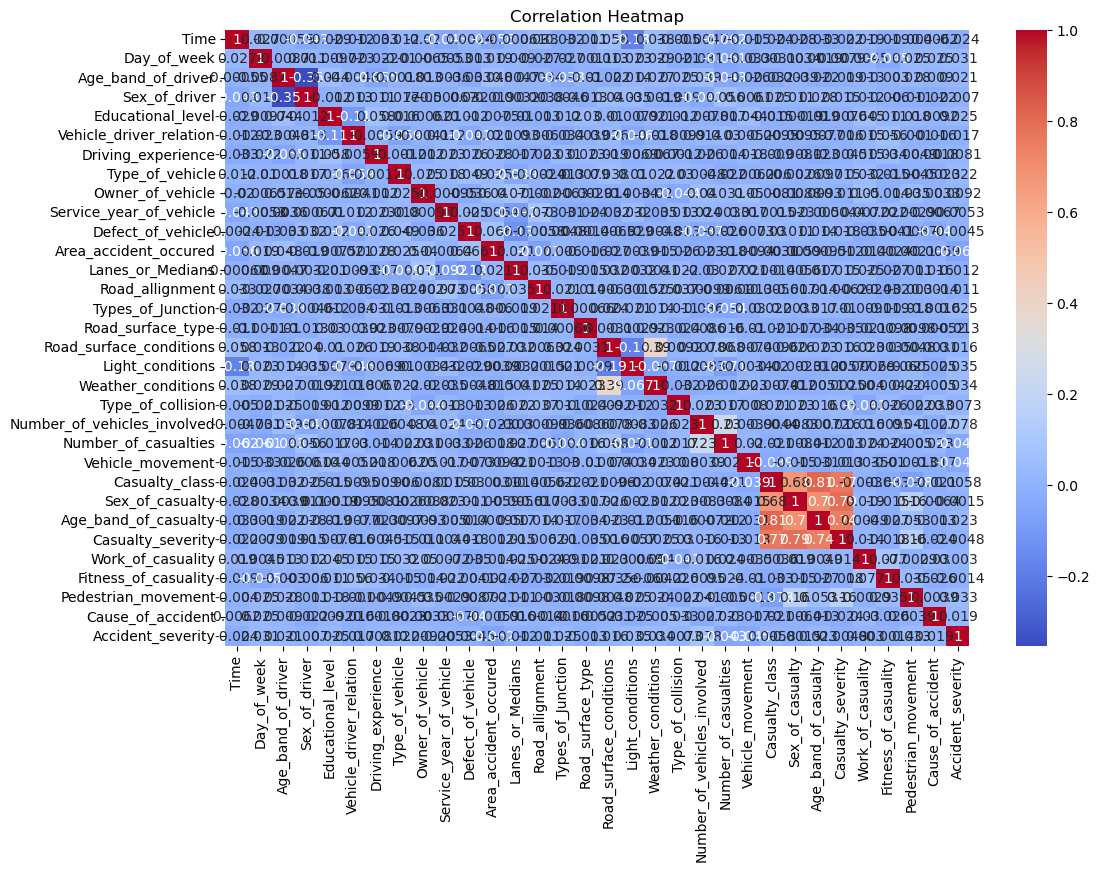

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


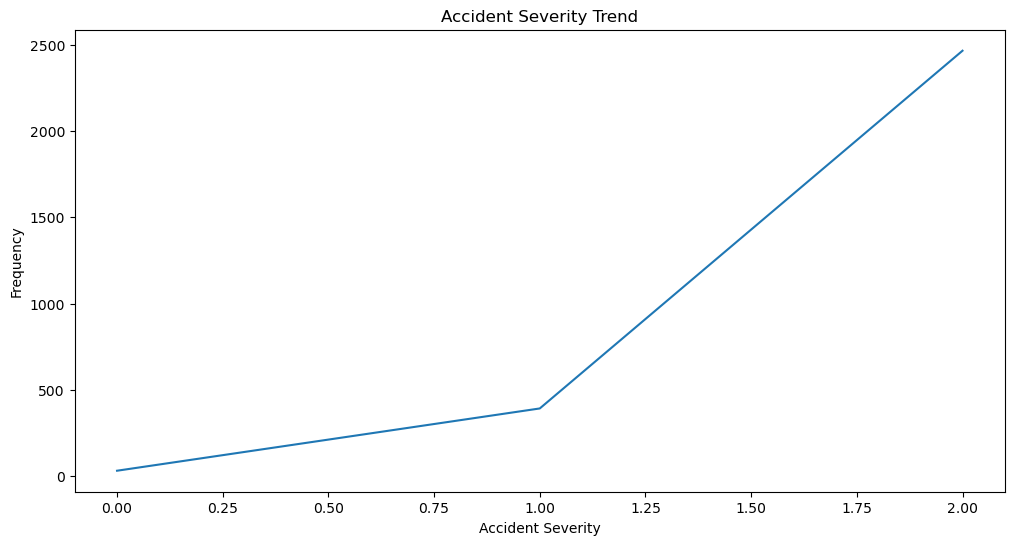

In [7]:
plt.figure(figsize=(12, 6))
data['Accident_severity'].value_counts().sort_index().plot(kind='line')
plt.title('Accident Severity Trend')
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')
plt.show()


In [10]:
X = data.drop('Accident_severity', axis=1)
Y = data['Accident_severity']


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)


KNeighborsClassifier()

In [14]:
Y_pred = knn.predict(X_test_scaled)


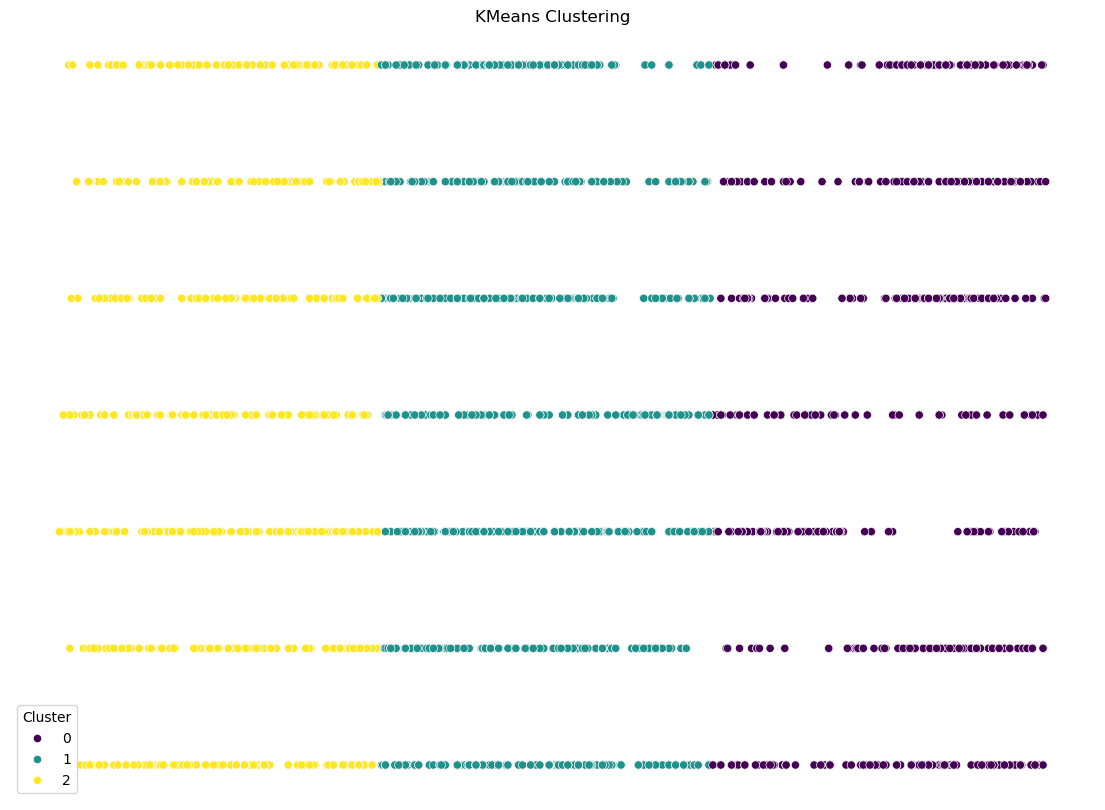

In [15]:
numeric_columns = data.select_dtypes(include='number').columns[:2]
X_cluster = data[numeric_columns]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(14, 10))
sns.scatterplot(x=X_cluster.iloc[:, 0], y=X_cluster.iloc[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('KMeans Clustering')
plt.axis('off')  # Hiding axes
plt.show()


In [22]:
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))
print('\nClassification Report:\n', classification_report(Y_test, Y_pred))
print('\nAccuracy Score:', accuracy_score(Y_test, Y_pred))



Confusion Matrix:
 [[  0   0  12]
 [  0   1 105]
 [  0  18 731]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.05      0.01      0.02       106
           2       0.86      0.98      0.92       749

    accuracy                           0.84       867
   macro avg       0.30      0.33      0.31       867
weighted avg       0.75      0.84      0.79       867


Accuracy Score: 0.8442906574394463


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


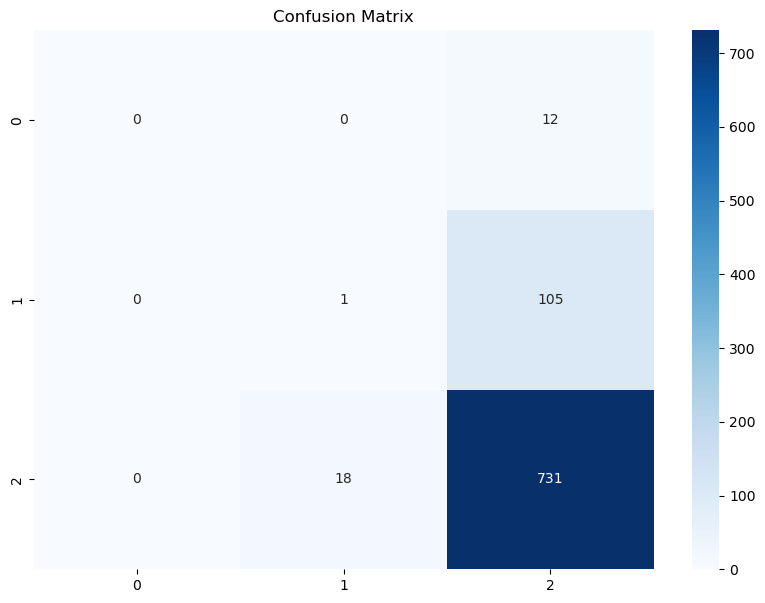

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


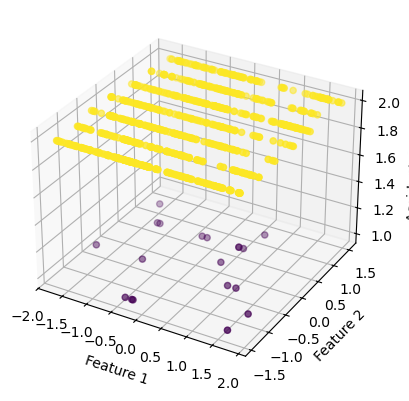

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Accident Severity')

sc = ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], Y_pred, c=Y_pred, cmap='viridis')
